# Importing Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Text processing
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [4]:
df = pd.read_csv("/content/Reviews.csv")

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


# Data Preprocessing

## Data description and each column's relevance:

- Id: This is just an index and not useful for analysis. It can be dropped.
- ProductId: Important to identify reviews related to specific products. Useful for analyzing sentiment per product and performing product-specific aggregations.
- UserId: This is helpful for analyzing behavior patterns across users, and understanding review frequency, or detecting repeat users.
- HelpfulnessNumerator & HelpfulnessDenominator: These indicate how helpful other users found the review. It could be useful for weighting reviews (i.e., reviews with more helpful votes could be considered more reliable).
- Score: The product rating (1–5). Essential for analyzing review sentiment correlations and can be a feature to predict or a label for classification.
- Time: This is useful for time-based analysis, trends, and seasonality (after conversion to a readable format). Keep this column.
- Summary: A brief version of the review. You can use this as an additional text field for sentiment analysis, though it might overlap with the Text.
- Text: The full review text is the most critical feature for sentiment analysis

## Data Cleaning

### Checking for missing values

In [10]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


## Here we found a very few missing values in the profilename and summary columns, which we can drop without any issue.

In [11]:
df = df.drop(columns=['Id', 'ProfileName'])

In [12]:
df.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
# Dropping rows with missing values in 'Summary'
df_cleaned = df.dropna(subset=['Summary'])

In [14]:
print(df_cleaned.isnull().sum())

ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


### Checking for Duplicates

In [15]:
duplicates = df_cleaned[df_cleaned.duplicated(subset=['ProductId', 'Text'], keep=False)]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 2152


In [16]:
# Dropping duplicates
df_cleaned = df_cleaned.drop_duplicates(subset=['ProductId', 'Text'])

### Dropping the duplicate rows

In [17]:
duplicates = df_cleaned[df_cleaned.duplicated(subset=['ProductId', 'Text'], keep=False)]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [18]:
# Verifying cleaning
print("Shape after cleaning:", df_cleaned.shape)
print("Missing values after cleaning:\n", df_cleaned.isnull().sum())

Shape after cleaning: (567103, 8)
Missing values after cleaning:
 ProductId                 0
UserId                    0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [19]:
# Converting the time to datetime format
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], unit='s')

# Verify the conversion
print(df_cleaned[['Time']].head())

        Time
0 2011-04-27
1 2012-09-07
2 2008-08-18
3 2011-06-13
4 2012-10-21


In [20]:
df.columns

Index(['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
df_cleaned = df

In [22]:
df_cleaned.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Exploration

In [23]:
# Exploring unique values in the Score column
unique_scores = df_cleaned['Score'].unique()
print("Unique Scores:", unique_scores)

Unique Scores: [5 1 4 2 3]


### There are 5 unique scores/ ratings as 1,2,3,4,5

In [24]:
# Checking the distribution of scores
score_distribution = df_cleaned['Score'].value_counts()
print("Score Distribution:\n", score_distribution)

Score Distribution:
 Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


### The distribution of the scores/ratings across the dataset vary widely as 5 has most of the distributions whereas 4,1,3, and 2 has minimal ratings in a descending order starting from 4 respectively.

In [25]:
# Display some unique values from the Summary and Text columns
print("Unique Summaries:\n", df_cleaned['Summary'].unique()[:10])
print("Unique Texts:\n", df_cleaned['Text'].unique()[:10])

Unique Summaries:
 ['Good Quality Dog Food' 'Not as Advertised' '"Delight" says it all'
 'Cough Medicine' 'Great taffy' 'Nice Taffy'
 'Great!  Just as good as the expensive brands!' 'Wonderful, tasty taffy'
 'Yay Barley' 'Healthy Dog Food']
Unique Texts:
 ['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavor

Distribution of ratings score

<ipython-input-26-7050d4ae42f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_cleaned['Score'], palette='viridis')


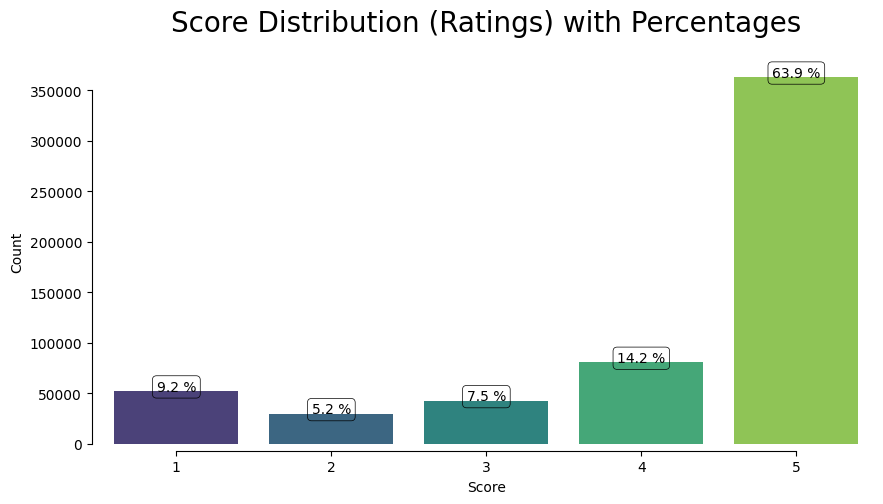

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot with percentages for Score distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df_cleaned['Score'], palette='viridis')
total = float(len(df_cleaned))  # Get the total number of reviews

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 75,
            '{:1.1f} %'.format((height / total) * 100),
            ha="center", bbox=dict(facecolor='none', edgecolor='black',
                                   boxstyle='round', linewidth=0.5))

# Set plot title and axis labels
ax.set_title('Score Distribution (Ratings) with Percentages', fontsize=20, y=1.05)
ax.set_xlabel('Score')
ax.set_ylabel('Count')

# Customize the axes and appearance
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Show plot
plt.show()


### From the plot, it is clear that the majority of the reviews are skewed towards positive reviews (with a Score of 5, representing 63.9% of the total), while lower scores are much less frequent. This imbalance in the distribution of scores can indeed introduce bias in your sentiment analysis model.

- Bias in Imbalanced Datasets:
Over-representation of Positive Sentiment: Since most of the reviews have a high score (5), the model might become biased toward predicting positive sentiments more frequently, potentially ignoring or underperforming on negative or neutral reviews.
Under-representation of Negative Sentiment: The lower ratings (1, 2) are under-represented, so the model might not learn enough patterns from those, which can hurt its performance in predicting negative sentiment.
Approaches to Address Bias:
Resampling Techniques:

- Undersampling: Reduce the number of samples from the over-represented class (i.e., score = 5) to balance the dataset.
Oversampling: Duplicate or generate more samples (e.g., using SMOTE) for the under-represented classes (i.e., score = 1, 2, etc.).
- Stratified Sampling:
When splitting your data for training and testing, use stratified sampling to maintain the same class distribution in both sets. This ensures that the model sees a similar imbalance in training and testing data.

- Class Weighting:
When using classification algorithms, you can assign class weights to the loss function, giving higher importance to the minority classes (lower scores) so that the model pays more attention to them during training.

- Balanced Subset for Analysis:
If you're conducting aspect-based sentiment analysis or specific analyses where balance is critical, you can take a balanced subset of the data with an equal number of reviews from each score. However, this could result in data loss and reduced diversity, so it should be done cautiously.

Since I am going to perform Aspect-based sentiment analysis, I would like to go with Balanced Subset for Analysis.

In [27]:
import pandas as pd

# Get the minimum count of reviews across all ratings
min_count = df_cleaned['Score'].value_counts().min()

# Create a balanced dataset by sampling 'min_count' reviews from each rating category
df_balanced = df_cleaned.groupby('Score').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Check the distribution of ratings in the balanced dataset
print(df_balanced['Score'].value_counts())

Score
1    29769
2    29769
3    29769
4    29769
5    29769
Name: count, dtype: int64


<ipython-input-27-43bf257a3281>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_cleaned.groupby('Score').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


<ipython-input-28-88102d401296>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_balanced['Score'], palette='Set2')


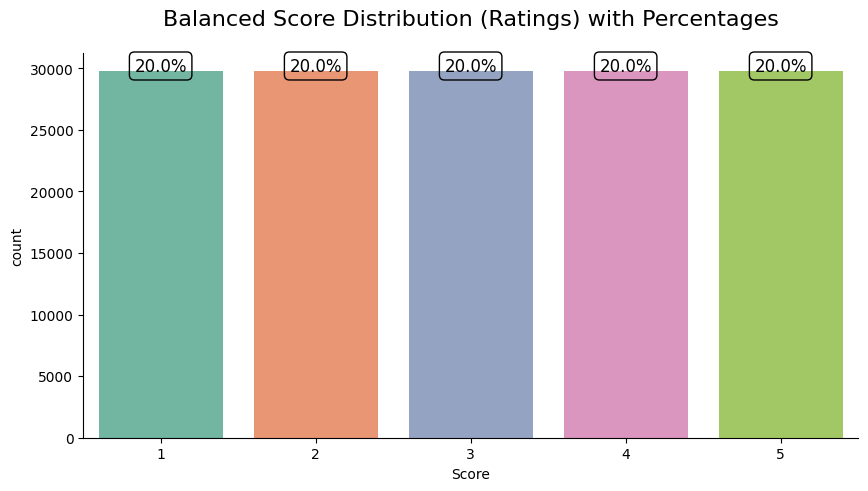

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'Score' for the balanced dataset
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df_balanced['Score'], palette='Set2')

# Calculate the total number of rows
total = float(len(df_balanced))

# Add percentage annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, '{:1.1f}%'.format((height/total) * 100),
            ha="center", fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'))

# Set title and display the plot
ax.set_title('Balanced Score Distribution (Ratings) with Percentages', fontsize=16, y=1.05)
sns.despine(right=True)
plt.show()


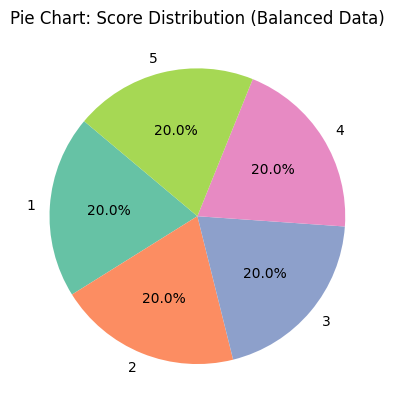

In [29]:
# Pie chart for the balanced data
score_values = df_balanced['Score'].value_counts()
plt.pie(score_values, labels=score_values.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Pie Chart: Score Distribution (Balanced Data)')
plt.show()

Now that we have a balanced dataset, We can go ahead with the analysis.

In [30]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148845 entries, 0 to 148844
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               148845 non-null  object
 1   UserId                  148845 non-null  object
 2   HelpfulnessNumerator    148845 non-null  int64 
 3   HelpfulnessDenominator  148845 non-null  int64 
 4   Score                   148845 non-null  int64 
 5   Time                    148845 non-null  int64 
 6   Summary                 148818 non-null  object
 7   Text                    148845 non-null  object
dtypes: int64(4), object(4)
memory usage: 9.1+ MB


# Data Cleaning- Text Preprocessing

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import nltk
nltk.download('punkt_tab')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [33]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Custom stopwords (refined to retain sentiment/topic relevance)
custom_stopwords = stop_words - {"not", "no", "nor", "like", "good", "great", "bad", "worse",
                                 "excellent", "poor", "love", "hate", "recommend", "product",
                                 "flavor", "package", "candy"}

# Enhanced preprocessing function
def preprocess_text_v2(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions and handle negations
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"n't", " not", text)  # doesn't -> does not
    text = re.sub(r"'re", " are", text)  # they're -> they are
    text = re.sub(r"'s", " is", text)    # it's -> it is
    text = re.sub(r"'ll", " will", text)  # I'll -> I will
    text = re.sub(r"'ve", " have", text)  # I've -> I have
    text = re.sub(r"'d", " would", text)  # I'd -> I would
    text = re.sub(r"i'm", "i am", text)   # I'm -> I am

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in custom_stopwords]

    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words while preserving sentence structure
    cleaned_text = ' '.join(words)

    return cleaned_text


In [34]:
# Apply the preprocessing function to the dataset
df_balanced['Cleaned_Text'] = df_balanced['Text'].apply(preprocess_text_v2)

# Preview the cleaned dataset
print(df_balanced[['Text', 'Cleaned_Text']].head(20))

                                                 Text  \
0   First off, I didn't purchase this product thro...   
1   I had to get a special order to return this it...   
2   I TRIED SEVERAL TIMES TO MAKE THIS WORK AND CO...   
3   Agree with the previous review, at this price ...   
4   THESE ARE THE WORST FRUIT SLICES CANDY I HAVE ...   
5   I can't believe I paid a nickle of my hard-ear...   
6   One container of this soup (15 oz) contains 15...   
7   Seriously, these newly formulated potato "buds...   
8   This item is way over priced.  Don't pay $1 / ...   
9   I thought these looked perfect for training so...   
10  Only 2 of the 7 pods sprouted. When I filed a ...   
11  Don't waste your money and order directly from...   
12  I do not know  how anyone can get these to mak...   
13  I buy most everything from Amazon BUT not coff...   
14  As you might expect from the world's most anno...   
15  so, I love the other dried fruit organic produ...   
16  I purchased these because o

In [35]:
import pandas as pd

# Adjust display settings to show full text
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.max_rows', None)     # Show all rows (optional)

# Display the DataFrame
df_balanced[['Text', 'Cleaned_Text']].head(20) # Adjust the number of rows to preview

,Text,Cleaned_Text
0,"First off, I didn't purchase this product through Amazon, but at a local grocery store, so my review only reflects the product itself, not Amazon in any way. I bought this last week never having tried coconut water before, but I heard good things. The taste of it was almost like the smell of lawn clippings that had been damp and out in the sun for a long time. Tasted off and had a faint mold smell to it. I didn't know if it was supposed to taste like that or not as I never tried it before, but paying as much as I did I felt obligated to finish it off. I've been ill for about a week after drinking it. I don't know if it was just a coincidence or the cause of it. I did email customer service at O.N.E. the day I drank it asking if it was supposed to taste like that or if I got a bad batch, and they still haven't replied to me.",first not purchase product amazon local grocery store review reflects product not amazon way bought last week never tried coconut water heard good thing taste almost like smell lawn clipping damp sun long time tasted faint mold smell not know supposed taste like not never tried paying much felt obligated finish ill week drinking not know coincidence cause email customer service one day drank asking supposed taste like got bad batch still not replied
1,"I had to get a special order to return this item, because there was something wrong with the berries dude! They were crusty and gross, unlike this product on a typical day which is crunchy and refreshing. No bueno!",get special order return item something wrong berry dude crusty gross unlike product typical day crunchy refreshing no bueno
2,I TRIED SEVERAL TIMES TO MAKE THIS WORK AND COULD NOT GET IT TO ACTIVATEAND I COULD NOT RETURN IT SO IFEEL I GOT RIPPED OFF!,tried several time make work could not get activateand could not return ifeel got ripped
3,"Agree with the previous review, at this price I have 2 bottles coming from Lollicup including shipping...great item, terrible pricing.",agree previous review price 2 bottle coming lollicup including shippinggreat item terrible pricing
4,"THESE ARE THE WORST FRUIT SLICES CANDY I HAVE EVER EATEN IN MY LIFE!!! THESE HAVE NO FLAVOR WHATSOEVER.....LIKE EATING PASTE.I DON'T KNOW WHO IS RESPONSIBLE FOR MANUFACTURING THIS HIGHLY INFERIOR CANDY PRODUCT,BUT I HOPE THEY GO OUT OF BUSINESS VERY SOON!!! THE BOSTON BRAND FRUIT SLICES YOU SEE ON AMAZON ARE FANTASTIC AND TASTE JUST THE WAY FRUIT SLICES CANDYB ARE SUPPOSED TO TASTE.",worst fruit slice candy ever eaten life no flavor whatsoeverlike eating pastei not know responsible manufacturing highly inferior candy productbut hope go business soon boston brand fruit slice see amazon fantastic taste way fruit slice candyb supposed taste
5,"I can't believe I paid a nickle of my hard-earned money for this stuff.<br />I also can't believe all the good reviews it got. You put it in a cup, add 3/4 cup of boiling water and stir it up. A bunch of white stuff that may be dried noodles will be floating on top. After a LOT MORE stirring, and it's been sitting there for a while (long enough to be too cool to eat), the noodles get more-or-less soft.<br />Take a sip. It taste like hot tap water with a hint of chicken broth. On top of that it gave me heartburn. I guess THAT part is MY problem, and YMMV.<br />I won't even give this junk away.<br />Read the label: One CUP of this ""soup"" has 25% of the daily requirement of SODIUM!",not believe paid nickle hardearned money stuffi also not believe good review got put cup add 34 cup boiling water stir bunch white stuff may dried noodle floating top lot stirring sitting long enough cool eat noodle get moreorless softtake sip taste like hot tap water hint chicken broth top gave heartburn guess part problem ymmvi not even give junk awayread label one cup soup 25 daily requirement sodium
6,One container of this soup (15 oz) contains 1520mg of Sodium (64% of your daily allowable intake) and it tasted like it. Campbell should 

# Exploratory Data Analysis

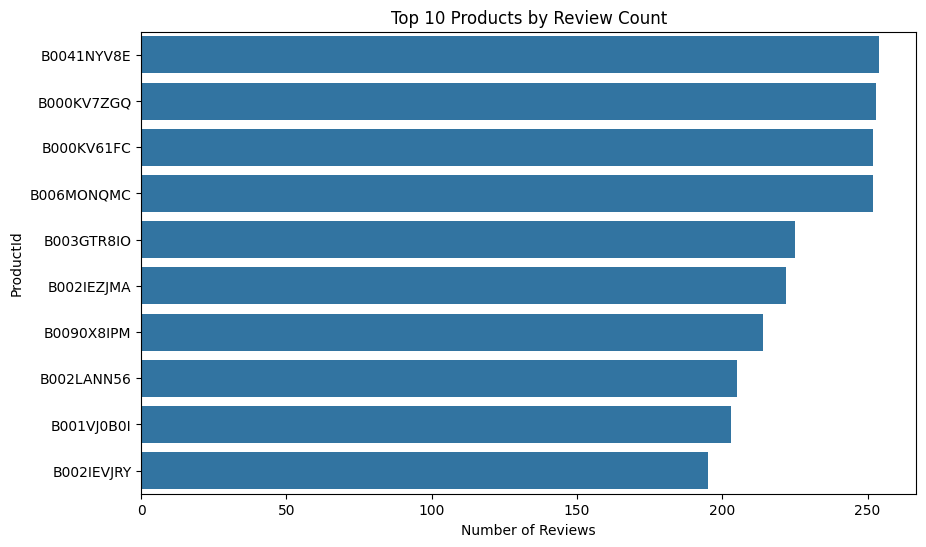

In [36]:
# Top Product Details
top_products = df_balanced['ProductId'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Review Count')
plt.xlabel('Number of Reviews')
plt.show()

Helpfulness of reviews

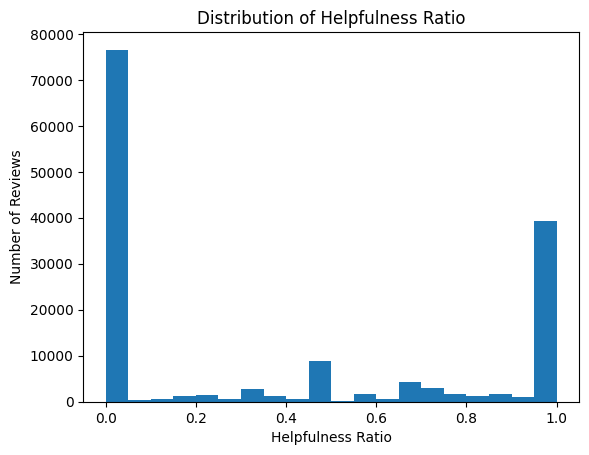

In [37]:
df_balanced['HelpfulnessRatio'] = df_balanced['HelpfulnessNumerator'] / (df_balanced['HelpfulnessDenominator'] + 1e-10)  # Avoid division by zero
plt.hist(df_balanced['HelpfulnessRatio'], bins=20)
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Number of Reviews')
plt.show()


Review length analysis

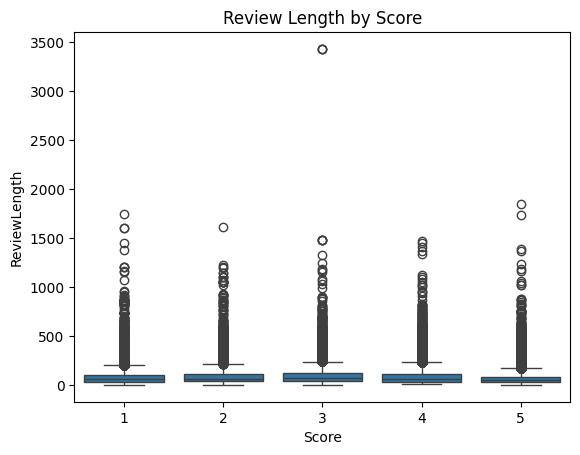

In [38]:
df_balanced['ReviewLength'] = df_balanced['Text'].apply(lambda x: len(x.split()))
sns.boxplot(x='Score', y='ReviewLength', data=df_balanced)
plt.title('Review Length by Score')
plt.show()

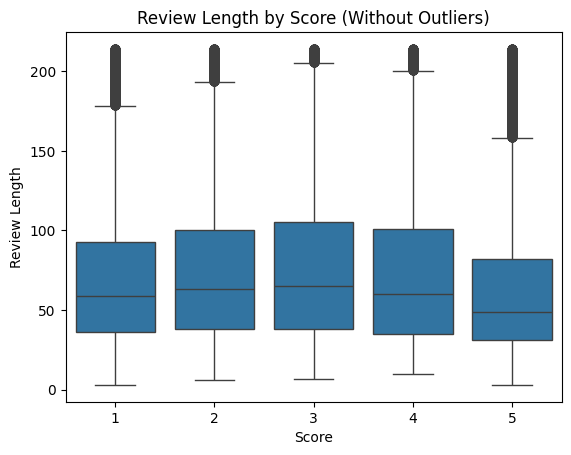

In [39]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_balanced['ReviewLength'].quantile(0.25)
Q3 = df_balanced['ReviewLength'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df_balanced[(df_balanced['ReviewLength'] >= lower_bound) & (df_balanced['ReviewLength'] <= upper_bound)]

# Plot again without outliers
sns.boxplot(x='Score', y='ReviewLength', data=df_no_outliers)
plt.title('Review Length by Score (Without Outliers)')
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.show()


In [40]:
df_no_outliers.shape

(139580, 11)

### Review time analysis

<ipython-input-41-a16f931021fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['ReviewDate'] = pd.to_datetime(df_no_outliers['Time'], unit='s')


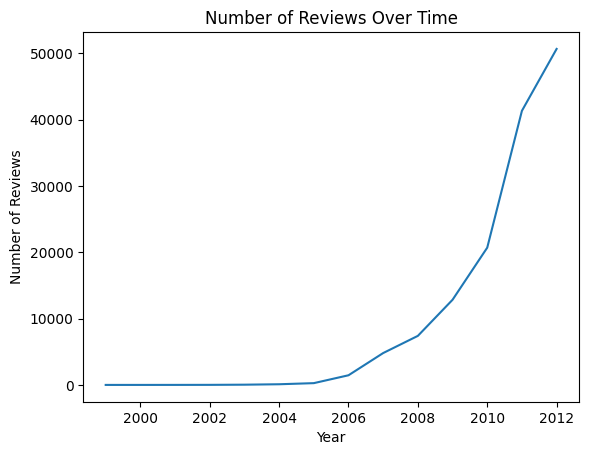

In [41]:
df_no_outliers['ReviewDate'] = pd.to_datetime(df_no_outliers['Time'], unit='s')
df_balanced.groupby(df_no_outliers['ReviewDate'].dt.year).size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


### Here the reviews have picked up since 2005 and increased linearly till 2008, and later people started reviewing the items more and we can see an exponential increase from 2008 to 2012

In [42]:
df_no_outliers.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,HelpfulnessRatio,ReviewLength,ReviewDate
0,B001EQ5IPQ,AM4V5VGXP99YA,1,1,1,1335225600,O.N.E. awful experience,"First off, I didn't purchase this product through Amazon, but at a local grocery store, so my review only reflects the product itself, not Amazon in any way. I bought this last week never having tried coconut water before, but I heard good things. The taste of it was almost like the smell of lawn clippings that had been damp and out in the sun for a long time. Tasted off and had a faint mold smell to it. I didn't know if it was supposed to taste like that or not as I never tried it before, but paying as much as I did I felt obligated to finish it off. I've been ill for about a week after drinking it. I don't know if it was just a coincidence or the cause of it. I did email customer service at O.N.E. the day I drank it asking if it was supposed to taste like that or if I got a bad batch, and they still haven't replied to me.",first not purchase product amazon local grocery store review reflects product not amazon way bought last week never tried coconut water heard good thing taste almost like smell lawn clipping damp sun long time tasted faint mold smell not know supposed taste like not never tried paying much felt obligated finish ill week drinking not know coincidence cause email customer service one day drank asking supposed taste like got bad batch still not replied,1.000000,171,2012-04-24
1,B0011CVGA4,A1H437CKBZPEZ4,0,1,1,1321833600,THERE WAS SOMETHING WRONG WITH THIS PRODUCT,"I had to get a special order to return this item, because there was something wrong with the berries dude! They were crusty and gross, unlike this product on a typical day which is crunchy and refreshing. No bueno!",get special order return item something wrong berry dude crusty gross unlike product typical day crunchy refreshing no bueno,0.000000,39,2011-11-21
2,B000LKV76K,A3KWR243PQQ288,4,7,1,1246406400,sourdough starter,I TRIED SEVERAL TIMES TO MAKE THIS WORK AND COULD NOT GET IT TO ACTIVATEAND I COULD NOT RETURN IT SO IFEEL I GOT RIPPED OFF!,tried several time make work could not get activateand could not return ifeel got ripped,0.571429,26,2009-07-01
3,B000AXSG08,A65CXRL2YZAES,3,5,1,1211068800,Great product but way cheaper elsewhere,"Agree with the previous review, at this price I have 2 bottles coming from Lollicup including shipping...great item, terrible pricing.",agree previous review price 2 bottle coming lollicup including shippinggreat item terrible pricing,0.600000,20,2008-05-18
4,B0000DISV6,A21MCMHHHIO3QT,1,2,1,1262131200,WORST FRUIT SLICES CANDY IN THE WORLD!!!,"THESE ARE THE WORST FRUIT SLICES CANDY I HAVE EVER EATEN IN MY LIFE!!! THESE HAVE NO FLAVOR WHATSOEVER.....LIKE EATING PASTE.I DON'T KNOW WHO IS RESPONSIBLE FOR MANUFACTURING THIS HIGHLY INFERIOR CANDY PRODUCT,BUT I HOPE THEY GO OUT OF BUSINESS VERY SOON!!! THE BOSTON BRAND FRUIT SLICES YOU SEE ON AMAZON ARE FANTASTIC AND TASTE JUST THE WAY FRUIT SLICES CANDYB ARE SUPPOSED TO TASTE.",worst fruit slice candy ever eaten life no flavor whatsoeverlike eating pastei not know responsible manufacturing highly inferior candy productbut hope go business soon boston brand fruit slice see amazon fantastic taste way fruit slice candyb supposed taste,0.500000,65,2009-12-30


<ipython-input-43-82fe0bb7770a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['ReviewYear'] = df_no_outliers['ReviewDate'].dt.year


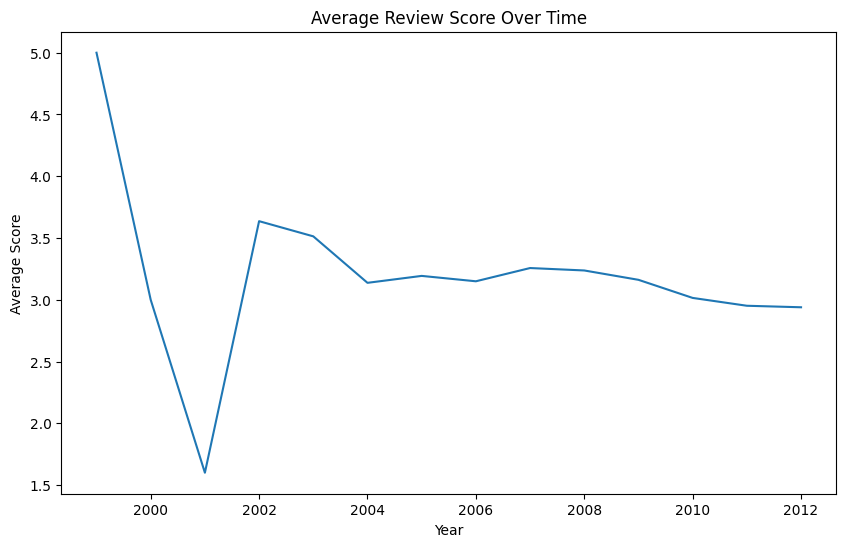

In [43]:
# Calculating the average score per year
df_no_outliers['ReviewYear'] = df_no_outliers['ReviewDate'].dt.year
avg_score_by_year = df_no_outliers.groupby('ReviewYear')['Score'].mean()

# Plotting the trend
plt.figure(figsize=(10,6))
avg_score_by_year.plot()
plt.title('Average Review Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

The average review score over time has seen fluctuations over the years.

### Word frequency analysis

In [44]:
from wordcloud import WordCloud


In [45]:
from collections import Counter

# Combine all words into one list
all_words = ' '.join(df_no_outliers['Cleaned_Text']).split()

# Get word frequencies
word_freq = Counter(all_words)

# Display the 20 most common words
common_words = word_freq.most_common(20)
print("Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Most Common Words:
not: 177209
like: 67276
taste: 57570
product: 45693
good: 45372
would: 45026
flavor: 44168
one: 41396
coffee: 41196
tea: 29952
love: 26541
great: 26522
get: 26080
food: 25687
no: 23247
really: 23084
much: 21720
dog: 21444
make: 20465
time: 19974


In [46]:
# Remove the specific word "one" from the 'Text' column
df_no_outliers['Cleaned_Text'] = df_no_outliers['Cleaned_Text'].str.replace(r'\bone\b', '', regex=True)

<ipython-input-46-b13d32fa4798>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cleaned_Text'] = df_no_outliers['Cleaned_Text'].str.replace(r'\bone\b', '', regex=True)


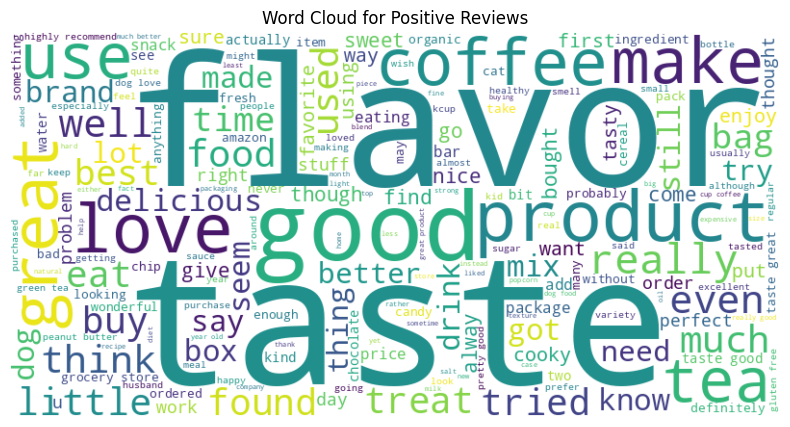

In [47]:
# Positive Reviews (Score 4 and 5)
positive_text = ' '.join(df_no_outliers[df_no_outliers['Score'] >= 4]['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

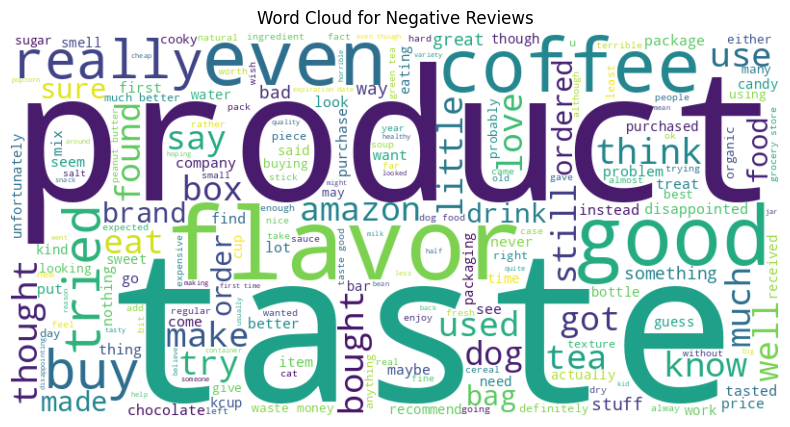

In [48]:
# Negative Reviews (Score 1 and 2)
negative_text = ' '.join(df_no_outliers[df_no_outliers['Score'] <= 2]['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to extract the top n words from a text series
def get_top_n_words(text_series, n):
    vectorizer = CountVectorizer(stop_words='english')
    word_counts = vectorizer.fit_transform(text_series)
    sum_words = word_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [50]:
# Data subsets based on scores
positive_reviews = df_no_outliers[df_no_outliers['Score'] >= 4]['Cleaned_Text']
neutral_reviews = df_no_outliers[df_no_outliers['Score'] == 3]['Cleaned_Text']
negative_reviews = df_no_outliers[df_no_outliers['Score'] <= 2]['Cleaned_Text']


In [51]:
# Extract top 50 words for each score range
top_words_positive = get_top_n_words(positive_reviews, 50)
top_words_neutral = get_top_n_words(neutral_reviews, 50)
top_words_negative = get_top_n_words(negative_reviews, 50)


In [52]:
# Print results
print("Top 50 words in positive reviews:", top_words_positive)
print("Top 50 words in neutral reviews:", top_words_neutral)
print("Top 50 words in negative reviews:", top_words_negative)


Top 50 words in positive reviews: [('like', 23947), ('good', 21201), ('taste', 19013), ('flavor', 17193), ('great', 16696), ('coffee', 16196), ('love', 15292), ('product', 14653), ('tea', 12960), ('food', 10560), ('make', 9544), ('really', 9294), ('little', 8541), ('dog', 8507), ('time', 8004), ('price', 7856), ('use', 7525), ('bag', 7228), ('best', 6852), ('amazon', 6796), ('buy', 6538), ('tried', 6365), ('better', 6289), ('treat', 5863), ('store', 5751), ('try', 5739), ('cup', 5730), ('eat', 5700), ('chocolate', 5334), ('day', 5248), ('drink', 5247), ('bit', 5130), ('box', 5013), ('sweet', 5007), ('nice', 4788), ('water', 4685), ('brand', 4609), ('think', 4532), ('used', 4530), ('year', 4467), ('snack', 4464), ('sugar', 4437), ('cat', 4379), ('chip', 4270), ('lot', 4153), ('way', 4131), ('favorite', 4054), ('recommend', 3971), ('thing', 3949), ('work', 3909)]
Top 50 words in neutral reviews: [('like', 15002), ('taste', 13145), ('flavor', 11109), ('good', 10611), ('coffee', 10054), ('

# Helpfulness ratio v/s score

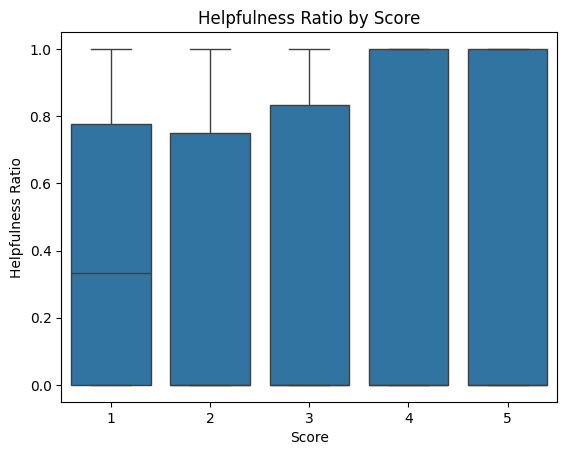

In [53]:
sns.boxplot(x='Score', y='HelpfulnessRatio', data=df_no_outliers)
plt.title('Helpfulness Ratio by Score')
plt.xlabel('Score')
plt.ylabel('Helpfulness Ratio')
plt.show()

In [54]:
df_no_outliers.to_csv('Cleaned_Reviews.csv', index=False)

# Saved the DataFrame to a CSV file

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns